项目 github搜transformer  
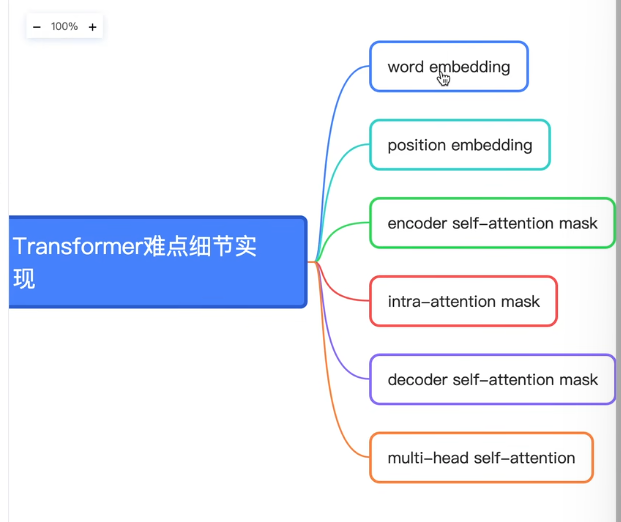

In [2]:
import torch
import numpy as np
from torch import nn
from torch.nn import functional as F

In [50]:
# 关于word embedding，以序列建模为例
# 考虑source sentence与target sentence
# 构建序列，序列的字符以其在词表中的索引的形式表示


# torch.manual_seed(seed)
batch_size = 2
# 单词表大小
max_num_src_words = 8
max_num_tgt_words = 8
# 序列最大长度
max_src_seq_len = 5
max_tgt_seq_len = 5

# src_len = torch.randint(2, 5, (batch_size, )) 这里写死了
src_len = torch.Tensor([2, 4]).to(torch.int32)
tgt_len = torch.Tensor([4, 3]).to(torch.int32)
print("*"*100)
print(src_len)
print(tgt_len)

# 单词索引构成的句子
# 不等长，需要padding
# 拼成(batch_size, max_seq_len)形状
src_seq = torch.cat([
    torch.unsqueeze(
        F.pad(torch.randint(1, max_num_src_words, size=(L, )), (0, max_src_seq_len-L)),
        0) 
        for L in src_len
    ])
tgt_seq = torch.cat([
    torch.unsqueeze(
        F.pad(torch.randint(1, max_num_tgt_words, size=(L, )), (0, max_tgt_seq_len-L)),
        0) 
        for L in src_len
    ])

print("*"*100)
print(src_seq)
print(tgt_seq)

# 构造embedding
# 词向量大小
model_dim = 8

src_embedding_table = nn.Embedding(max_num_src_words+1, model_dim)
tgt_embedding_table = nn.Embedding(max_num_tgt_words+1, model_dim)
# 注意看embedding中的向量与src_embedding中向量的对应
print("*"*100)
print(src_embedding_table.weight)
src_embedding = src_embedding_table(src_seq)
tgt_embedding = tgt_embedding_table(tgt_seq)
# print(src_embedding.size(), tgt_embedding.size())
print(src_embedding)

****************************************************************************************************
tensor([2, 4], dtype=torch.int32)
tensor([4, 3], dtype=torch.int32)
****************************************************************************************************
tensor([[6, 2, 0, 0, 0],
        [4, 5, 1, 2, 0]])
tensor([[6, 5, 0, 0, 0],
        [7, 6, 1, 1, 0]])
****************************************************************************************************
Parameter containing:
tensor([[ 1.6206, -1.6327, -1.2971, -0.2276, -1.3942,  0.5506, -0.9677,  0.9657],
        [ 0.1733, -0.9602, -0.1638, -1.4074,  0.4152,  1.1559,  0.8315,  0.8260],
        [-1.0269,  0.8589, -0.8155, -0.1295, -0.5557, -0.6266, -0.5688, -0.4276],
        [-0.6460,  0.0087, -1.2042, -0.8306, -0.4706, -0.7562, -0.0493,  0.2852],
        [ 0.1512,  0.0559,  0.6928, -0.0379,  1.4760, -0.1459,  0.3463, -1.3954],
        [-0.0406,  1.3272, -0.2921,  1.5827,  0.1524, -0.6837, -2.8273,  1.3267],
        [ 0.4

position embedding  
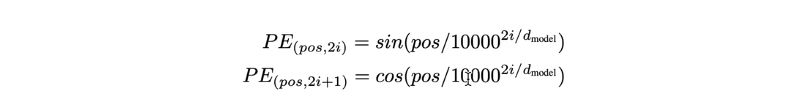

In [72]:
# 构造position_embedding，是一个常量，无梯度
max_position_len = 5

# pos是行，每行的pos变量都一样
pos_mat = torch.arange(max_position_len).view(-1, 1)
print("*"*100)
print(pos_mat)

# i是列，d_{model}是model_dim
i_mat = torch.pow(10000, torch.arange(0, 8, 2).reshape(1, -1)/model_dim)
print(i_mat)

pe_embedding_table = torch.zeros(max_position_len, model_dim)
# 偶数列
pe_embedding_table[:,  0::2] = torch.sin(pos_mat/i_mat) #broadingcast
# 奇数列
pe_embedding_table[:,  1::2] = torch.cos(pos_mat/i_mat)
print(pe_embedding_table)

print("*"*100) # 反正就是把这个矩阵弄出来，这个矩阵是＋到前文的embedding中的
pe_embedding = nn.Embedding(max_position_len, model_dim)
pe_embedding.weight = nn.Parameter(pe_embedding_table, requires_grad=False)
src_pos = torch.cat([
    torch.unsqueeze(
        torch.arange(max(src_len)),
        dim=0
        ) for _ in src_len]).to(torch.int32)
tgt_pos = torch.cat([
    torch.unsqueeze(
        torch.arange(max(tgt_len)),
        dim=0
        ) for _ in tgt_len]).to(torch.int32)
print(src_pos)
src_pe_embedding = pe_embedding(src_pos) # 传入位置索引，具体看print的结果
tgt_pe_embedding = pe_embedding(tgt_pos)
print(src_pe_embedding)

****************************************************************************************************
tensor([[0],
        [1],
        [2],
        [3],
        [4]])
tensor([[   1.,   10.,  100., 1000.]])
tensor([[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
          1.0000e+00,  0.0000e+00,  1.0000e+00],
        [ 8.4147e-01,  5.4030e-01,  9.9833e-02,  9.9500e-01,  9.9998e-03,
          9.9995e-01,  1.0000e-03,  1.0000e+00],
        [ 9.0930e-01, -4.1615e-01,  1.9867e-01,  9.8007e-01,  1.9999e-02,
          9.9980e-01,  2.0000e-03,  1.0000e+00],
        [ 1.4112e-01, -9.8999e-01,  2.9552e-01,  9.5534e-01,  2.9995e-02,
          9.9955e-01,  3.0000e-03,  1.0000e+00],
        [-7.5680e-01, -6.5364e-01,  3.8942e-01,  9.2106e-01,  3.9989e-02,
          9.9920e-01,  4.0000e-03,  9.9999e-01]])
****************************************************************************************************
tensor([[0, 1, 2, 3],
        [0, 1, 2, 3]], dtype=torch.int32)
tensor([[[ 0.

encoding self-attention mask  
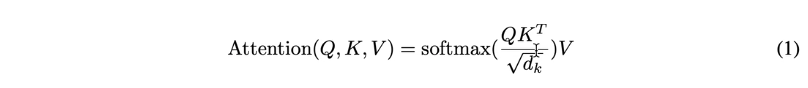

In [ ]:
# encoding self-attention mask说是为了训练加速？
# mask.shape: [batch_size, max_src_len, max_src_len], 值为1或-inf
valid_